### WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [221]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [222]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 620


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [223]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

       # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | edson
Processing Record 2 of Set 1 | ovruch
Processing Record 3 of Set 1 | aromashevo
Processing Record 4 of Set 1 | fayetteville
Processing Record 5 of Set 1 | fale old settlement
Processing Record 6 of Set 1 | saipan
Processing Record 7 of Set 1 | stanley
Processing Record 8 of Set 1 | bethel
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | port-aux-francais
Processing Record 11 of Set 1 | adamstown
Processing Record 12 of Set 1 | isafjordur
Processing Record 13 of Set 1 | mamers
Processing Record 14 of Set 1 | happy valley-goose bay
Processing Record 15 of Set 1 | iqaluit
Processing Record 16 of Set 1 | itoman
Processing Record 17 of Set 1 | rio grande
Processing Record 18 of Set 1 | sitka
Processing Record 19 of Set 1 | al bawiti
Processing Record 20 of Set 1 | lebu
Processing Record 21 of Set 1 | papatowai
Processing Record 22 of Set 1 | petropavlovsk-kamchatsky
Proc

Processing Record 41 of Set 4 | 'ali al gharbi
Processing Record 42 of Set 4 | rongelap
Processing Record 43 of Set 4 | shingu
Processing Record 44 of Set 4 | maragogi
Processing Record 45 of Set 4 | ponta delgada
Processing Record 46 of Set 4 | whyalla stuart
City not found. Skipping...
Processing Record 47 of Set 4 | ingeniero jacobacci
Processing Record 48 of Set 4 | vozhega
Processing Record 49 of Set 4 | ta`u
Processing Record 0 of Set 5 | aldona
Processing Record 1 of Set 5 | taro
Processing Record 2 of Set 5 | nacala
Processing Record 3 of Set 5 | hawaiian paradise park
Processing Record 4 of Set 5 | mont-dore
Processing Record 5 of Set 5 | pyetrykaw
Processing Record 6 of Set 5 | bonthe
Processing Record 7 of Set 5 | kodiak
Processing Record 8 of Set 5 | nyagan
Processing Record 9 of Set 5 | las lajitas
Processing Record 10 of Set 5 | yuzhno-kurilsk
Processing Record 11 of Set 5 | kasongo-lunda
Processing Record 12 of Set 5 | uturoa
Processing Record 13 of Set 5 | bamboo flat
P

Processing Record 32 of Set 8 | nicoya
Processing Record 33 of Set 8 | ojinaga
Processing Record 34 of Set 8 | mahina
Processing Record 35 of Set 8 | vilyuchinsk
Processing Record 36 of Set 8 | la passe
Processing Record 37 of Set 8 | choibalsan
Processing Record 38 of Set 8 | al-`ula
City not found. Skipping...
Processing Record 39 of Set 8 | santana
Processing Record 40 of Set 8 | walvis bay
Processing Record 41 of Set 8 | baidoa
Processing Record 42 of Set 8 | prado
Processing Record 43 of Set 8 | perry
Processing Record 44 of Set 8 | al jawf
Processing Record 45 of Set 8 | novodvinsk
Processing Record 46 of Set 8 | ribeira grande
Processing Record 47 of Set 8 | mossendjo
Processing Record 48 of Set 8 | trondheim
Processing Record 49 of Set 8 | pidhorodne
Processing Record 0 of Set 9 | dhuusamarreeb
Processing Record 1 of Set 9 | nizao
Processing Record 2 of Set 9 | egilsstadir
Processing Record 3 of Set 9 | tondano
Processing Record 4 of Set 9 | doka
Processing Record 5 of Set 9 | 

Processing Record 21 of Set 12 | pyt-yakh
Processing Record 22 of Set 12 | nikolayevsk-on-amure
Processing Record 23 of Set 12 | guerrero negro
Processing Record 24 of Set 12 | santiago de cao
Processing Record 25 of Set 12 | krasnoufimsk
Processing Record 26 of Set 12 | envira
Processing Record 27 of Set 12 | korla
Processing Record 28 of Set 12 | porto empedocle
Processing Record 29 of Set 12 | nelson bay
Processing Record 30 of Set 12 | tomatlan
Processing Record 31 of Set 12 | saurimo
Processing Record 32 of Set 12 | summerlin south
Processing Record 33 of Set 12 | kourou
Processing Record 34 of Set 12 | neiafu
Processing Record 35 of Set 12 | puerto maldonado
Processing Record 36 of Set 12 | sarvar
Processing Record 37 of Set 12 | wajir
Processing Record 38 of Set 12 | mazatlan
Processing Record 39 of Set 12 | rumson
Processing Record 40 of Set 12 | antonio enes
Processing Record 41 of Set 12 | san juan
Processing Record 42 of Set 12 | coahuayana de hidalgo
Processing Record 43 of

In [228]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,edson,53.5835,-116.4356,5.08,60,75,3.60,CA,1681759324
1,ovruch,51.3246,28.8035,7.10,74,57,2.85,UA,1681759324
2,aromashevo,56.8602,68.6375,-3.02,44,74,3.68,RU,1681759325
3,fayetteville,35.0527,-78.8784,23.06,28,0,7.72,US,1681759326
4,fale old settlement,-9.3852,-171.2468,28.60,71,100,5.24,TK,1681759326


In [229]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [230]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.sample(20)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
390,rawai,7.7797,98.3253,31.10,96,97,4.04,TH,1681759435
74,plastun,44.7561,136.2939,1.18,64,32,2.74,RU,1681759350
444,galveston,29.3669,-94.9669,25.59,37,0,5.66,US,1681759449
23,belyy yar,53.6039,91.3903,-1.06,59,0,9.00,RU,1681759307
133,sault ste. marie,46.5168,-84.3333,6.16,77,100,4.63,CA,1681759125
136,saint-pierre,-21.3393,55.4781,24.82,78,0,3.09,RE,1681759366
52,gazojak,41.1875,61.4036,8.94,23,0,4.65,TM,1681759344
433,san pedro pochutla,15.7333,-96.4667,32.62,43,10,4.47,MX,1681759166
530,buta,2.7858,24.7300,22.29,97,100,0.88,CD,1681759479


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

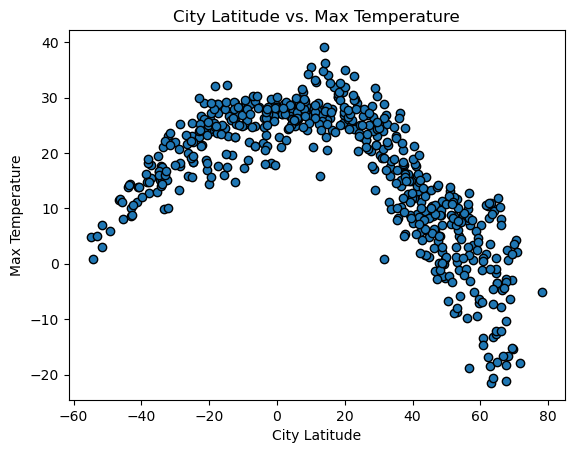

In [231]:
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black')

plt.title(f'City Latitude vs. Max Temperature')
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

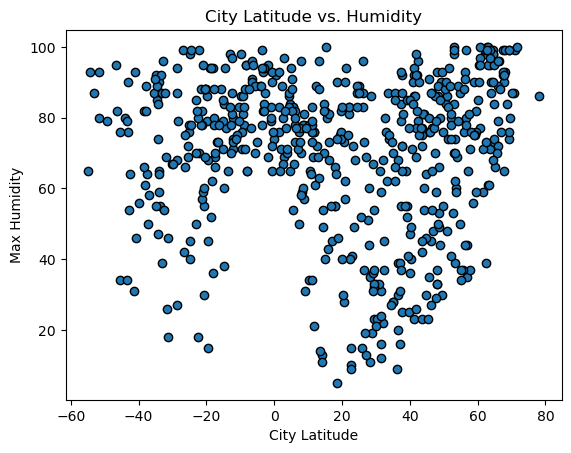

In [232]:
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')

plt.title(f'City Latitude vs. Humidity')
plt.xlabel('City Latitude')
plt.ylabel('Max Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

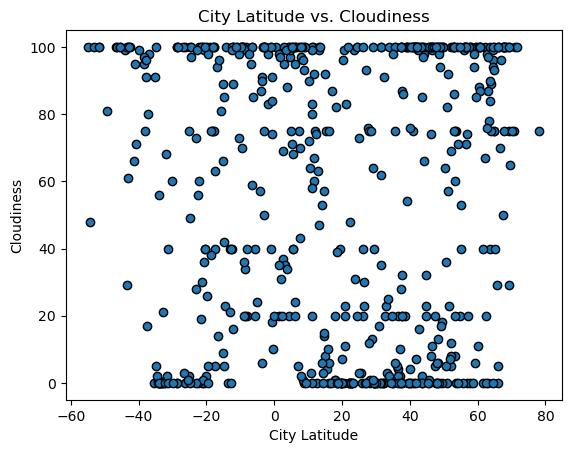

In [233]:
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')

plt.title(f'City Latitude vs. Cloudiness')
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

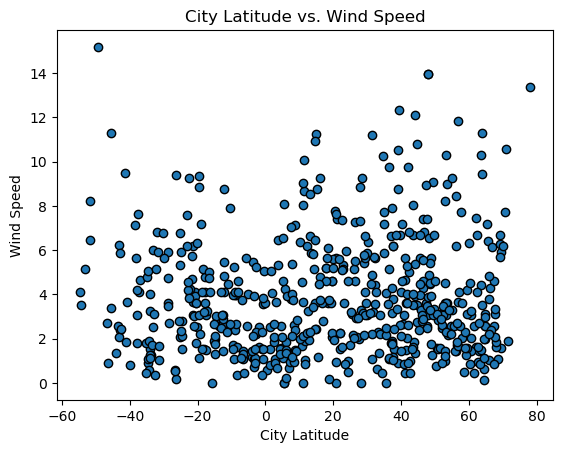

In [234]:
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')

plt.title(f'City Latitude vs. Wind Speed')
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


The R2 value is 0.33604551274650996


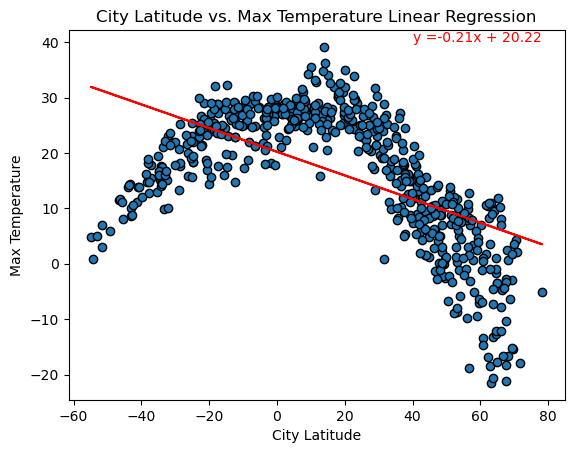

In [235]:
# Linear Regression plots
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_data_df['Lat'], city_data_df['Max Temp'])

regress_values = slope*city_data_df['Lat'] + intercept

line_eq = f'y ={round(slope, 2)}x + {round(intercept, 2)}'

plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors='black')
plt.title(f'City Latitude vs. Max Temperature Linear Regression')
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature')
plt.plot(city_data_df['Lat'], regress_values, color='red')

plt.annotate(line_eq, (40,40), color='red')

print(f'The R2 value is {rvalue**2}')

plt.show()

The R2 value is 0.00027174150267424586


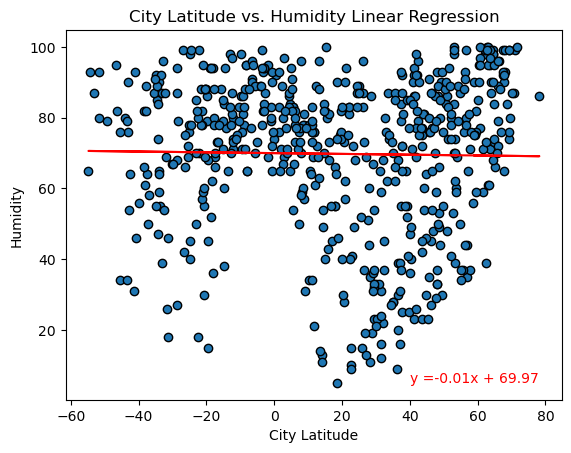

In [236]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_data_df['Lat'], city_data_df['Humidity'])

regress_values = slope*city_data_df['Lat'] + intercept

line_eq = f'y ={round(slope, 2)}x + {round(intercept, 2)}'

plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors='black')
plt.title(f'City Latitude vs. Humidity Linear Regression')
plt.xlabel('City Latitude')
plt.ylabel('Humidity')
plt.plot(city_data_df['Lat'], regress_values, color='red')

plt.annotate(line_eq, (40,5), color='red')

print(f'The R2 value is {rvalue**2}')

plt.show()

The R2 value is 0.0011183324537229486


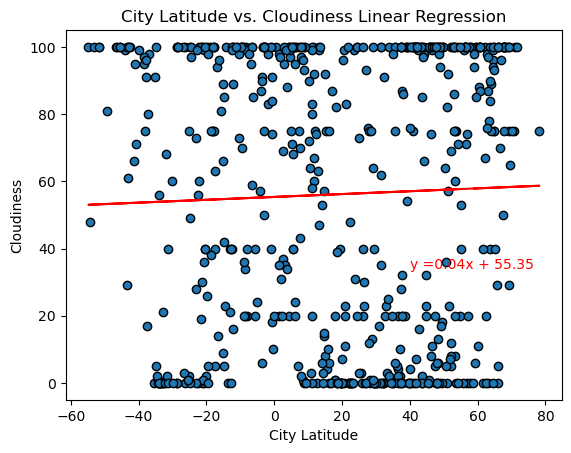

In [237]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_data_df['Lat'], city_data_df['Cloudiness'])

regress_values = slope*city_data_df['Lat'] + intercept

line_eq = f'y ={round(slope, 2)}x + {round(intercept, 2)}'

plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors='black')
plt.title(f'City Latitude vs. Cloudiness Linear Regression')
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
plt.plot(city_data_df['Lat'], regress_values, color='red')

plt.annotate(line_eq, (40,34), color='red')

print(f'The R2 value is {rvalue**2}')

plt.show()

The R2 value is 0.003148504728363184


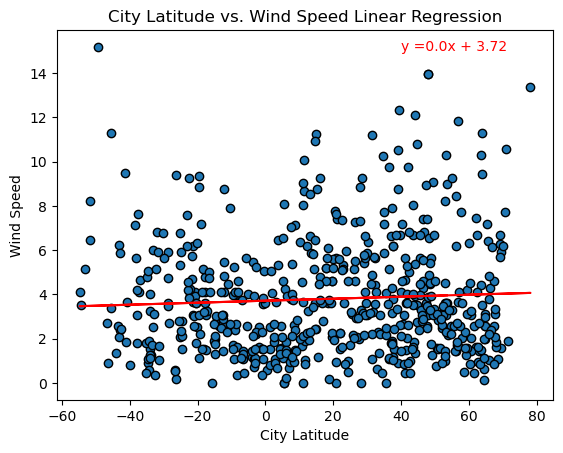

In [238]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(city_data_df['Lat'], city_data_df['Wind Speed'])

regress_values = slope*city_data_df['Lat'] + intercept

line_eq = f'y ={round(slope, 2)}x + {round(intercept, 2)}'

plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors='black')
plt.title(f'City Latitude vs. Wind Speed Linear Regression')
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed')
plt.plot(city_data_df['Lat'], regress_values, color='red')

plt.annotate(line_eq, (40,15), color='red')

print(f'The R2 value is {rvalue**2}')

plt.show()

In [239]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.sample(25)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
378,novodvinsk,64.4165,40.8122,-1.14,98,94,0.12,RU,1681759433
59,holualoa,19.6228,-155.9522,25.31,74,0,4.63,US,1681759346
309,konakovo,56.7000,36.7667,8.20,80,100,1.66,RU,1681759419
244,chinde,26.8418,88.0763,20.75,19,0,2.94,NP,1681759396
350,afif,23.9065,42.9172,20.29,68,31,5.95,SA,1681759428
113,bor,56.3567,44.0669,9.96,44,100,1.45,RU,1681759363
313,porto novo,6.4965,2.6036,28.90,77,100,3.94,BJ,1681759420
231,tralee,52.2704,-9.7026,12.00,80,12,3.48,IE,1681759393
166,galliano,29.4422,-90.2992,23.00,23,0,3.09,US,1681759370


In [240]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df =  city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.sample(25)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
16,rio grande,-32.0350,-52.0986,23.06,69,68,6.83,BR,1681759333
97,tocopilla,-22.0920,-70.1979,21.37,70,60,4.24,CL,1681759268
144,springs,-26.2500,28.4000,15.93,75,0,0.18,ZA,1681759367
83,blackmans bay,-43.0167,147.3167,8.62,90,61,2.41,AU,1681759355
69,afaahiti,-17.7500,-149.2833,27.93,80,100,4.81,PF,1681759348
234,rio gallegos,-51.6226,-69.2181,3.03,93,100,8.23,AR,1681759393
44,ushuaia,-54.8000,-68.3000,4.81,65,100,4.12,AR,1681759151
420,kirakira,-10.4544,161.9205,24.90,83,73,2.67,SB,1681759441
203,las lajitas,-24.6833,-64.2500,18.43,78,100,2.10,AR,1681759385


###  Temperature vs. Latitude Linear Regression Plot

The R2 value is 0.7519389805970379


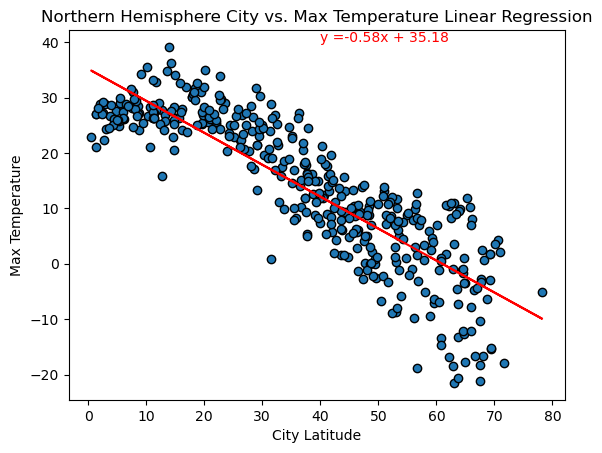

In [241]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])

regress_values = slope*northern_hemi_df['Lat'] + intercept

line_eq = f'y ={round(slope, 2)}x + {round(intercept, 2)}'

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], edgecolors='black')
plt.title('Northern Hemisphere City vs. Max Temperature Linear Regression')
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature')
plt.plot(northern_hemi_df['Lat'], regress_values, color='red')

plt.annotate(line_eq, (40,40), color='red')

print(f'The R2 value is {rvalue**2}')

plt.show()

The R2 value is 0.6166252062040546


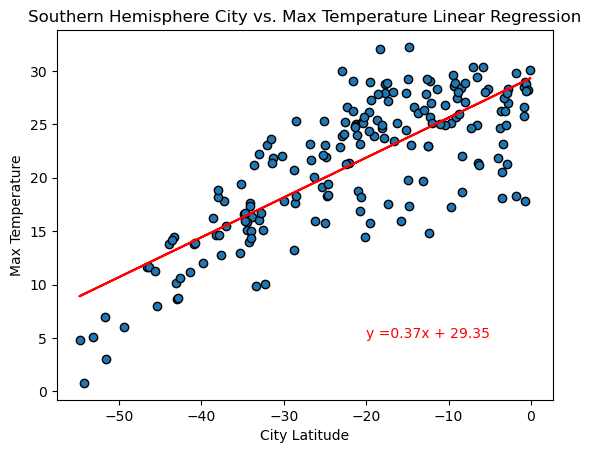

In [242]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])

regress_values = slope*southern_hemi_df['Lat'] + intercept

line_eq = f'y ={round(slope, 2)}x + {round(intercept, 2)}'

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], edgecolors='black')
plt.title('Southern Hemisphere City vs. Max Temperature Linear Regression')
plt.xlabel('City Latitude')
plt.ylabel('Max Temperature')
plt.plot(southern_hemi_df['Lat'], regress_values, color='red')

plt.annotate(line_eq, (-20, 5), color='red')

print(f'The R2 value is {rvalue**2}')

plt.show()

**Discussion about the linear relationship:** \
When observing the initial regression analysis between city latitude and max temperature we can clearly see a pattern in the data, as there is a clear data curve, with the principal access of that curve around the 0 degress latitude. As you move closer to the equator (0° latitude), the maximum temperature generally increases. Conversely, as you move closer to the poles (90° latitude), the maximum temperature generally decreases. However, when employing a linear analysis on this kind of data distribution, we lose precision in establishing the linear correlation between our two variables. With a dataset displaying a pattern such as this, we can gain more insight into the relationship between our two variables by breaking out the data along the approximate principal axis or centre of the data curve, which in this case was 0 degrees latitude. In doing so, we can clearly see the linear relationship between latitude and max temperature.

### Humidity vs. Latitude Linear Regression Plot

The R2 value is 0.034964288871986396


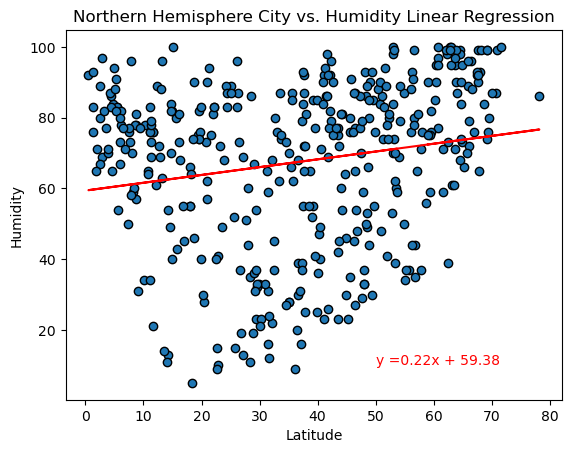

In [243]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])

regress_values = slope*northern_hemi_df['Lat'] + intercept

line_eq = f'y ={round(slope, 2)}x + {round(intercept, 2)}'

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], edgecolors='black')
plt.title('Northern Hemisphere City vs. Humidity Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.plot(northern_hemi_df['Lat'], regress_values, color='red')

plt.annotate(line_eq, (50,10), color='red')

print(f'The R2 value is {rvalue**2}')

plt.show()

The R2 value is 0.058509724096600824


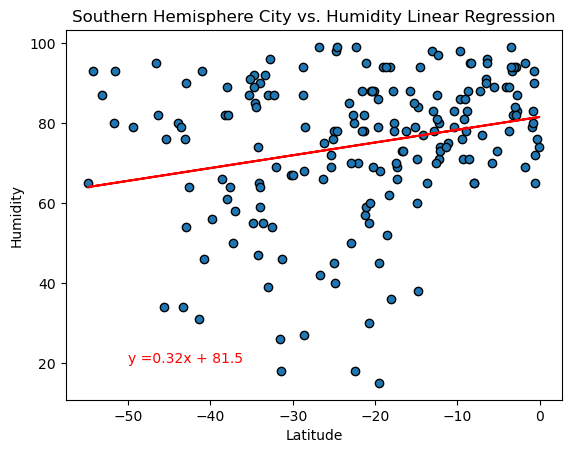

In [244]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])

regress_values = slope*southern_hemi_df['Lat'] + intercept

line_eq = f'y ={round(slope, 2)}x + {round(intercept, 2)}'

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], edgecolors='black')
plt.title('Southern Hemisphere City vs. Humidity Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.plot(southern_hemi_df['Lat'], regress_values, color='red')

plt.annotate(line_eq, (-50,20), color='red')

print(f'The R2 value is {rvalue**2}')

plt.show()

**Discussion about the linear relationship:** \
The relationship between latitude and humidity is not as straightforward as the relationship between latitude and maximum temperature. Although I lack a great understanding of overall influences on humidity, it could be due to a variety of localized factors such as temperature, air pressure, local geography, density of flora, and proximity to bodies of water. It appears that there is a trend towards higher humidity levels near the equator, but the overall relationship between latitude and humidity is far less linear, a certainly less correlated than latitude and maximum temperature.

### Cloudiness vs. Latitude Linear Regression Plot

The R2 value is 0.026908635913928707


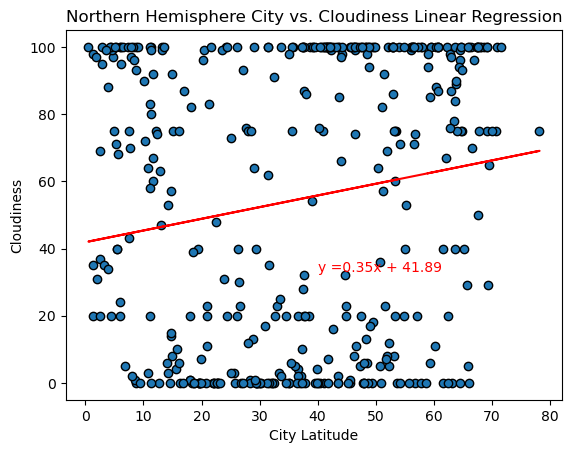

In [245]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])

regress_values = slope*northern_hemi_df['Lat'] + intercept

line_eq = f'y ={round(slope, 2)}x + {round(intercept, 2)}'

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], edgecolors='black')
plt.title('Northern Hemisphere City vs. Cloudiness Linear Regression')
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
plt.plot(northern_hemi_df['Lat'], regress_values, color='red')

plt.annotate(line_eq, (40,33), color='red')

print(f'The R2 value is {rvalue**2}')

plt.show()

The R2 value is 0.003161620368078698


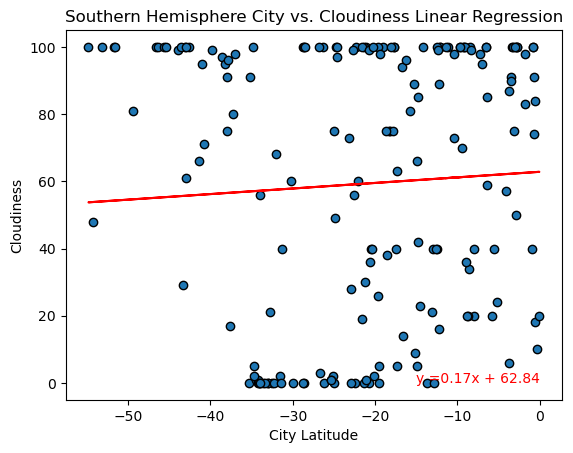

In [246]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])

regress_values = slope*southern_hemi_df['Lat'] + intercept

line_eq = f'y ={round(slope, 2)}x + {round(intercept, 2)}'

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], edgecolors='black')
plt.title('Southern Hemisphere City vs. Cloudiness Linear Regression')
plt.xlabel('City Latitude')
plt.ylabel('Cloudiness')
plt.plot(southern_hemi_df['Lat'], regress_values, color='red')

plt.annotate(line_eq, (-15, 0), color='red')

print(f'The R2 value is {rvalue**2}')

plt.show()

**Discussion about the linear relationship:** \
There appears to be a weak correlation cloudiness and latitude. It seems that in general, areas closer to the equator tend to have less cloud cover than areas closer to the poles. There are, however, many outlying datapoints that challenge this trend, likely due more localized factors, like what we observed with humidity, including topography, proximity to bodies of water, and prevailing wind patterns.

### Wind Speed vs. Latitude Linear Regression Plot

The R2 value is 0.00273006461009136


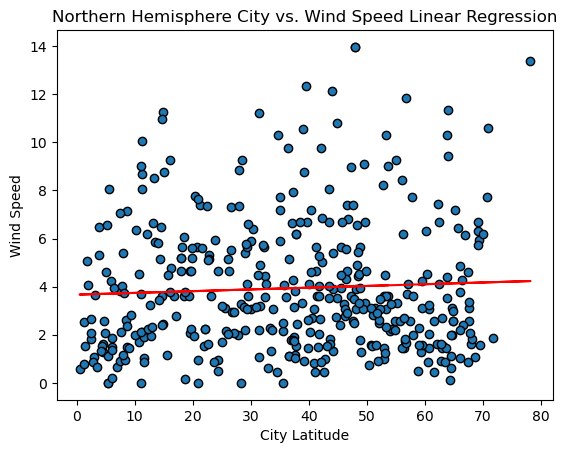

In [247]:
# Northern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])

regress_values = slope*northern_hemi_df['Lat'] + intercept

line_eq = f'y ={round(slope, 2)}x + {round(intercept, 2)}'

plt.scatter(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], edgecolors='black')
plt.title('Northern Hemisphere City vs. Wind Speed Linear Regression')
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed')
plt.plot(northern_hemi_df['Lat'], regress_values, color='red')

plt.annotate(line_eq, (40,33), color='red')

print(f'The R2 value is {rvalue**2}')

plt.show()

The R2 value is 0.06144399756739558


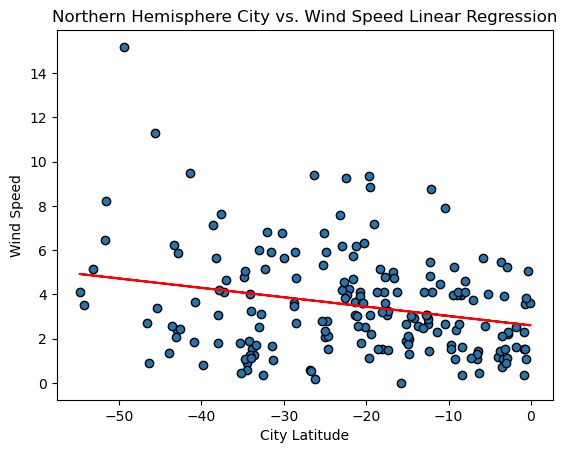

In [248]:
# Southern Hemisphere
(slope, intercept, rvalue, pvalue, stderr) = linregress(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])

regress_values = slope*southern_hemi_df['Lat'] + intercept

line_eq = f'y ={round(slope, 2)}x + {round(intercept, 2)}'

plt.scatter(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], edgecolors='black')
plt.title('Northern Hemisphere City vs. Wind Speed Linear Regression')
plt.xlabel('City Latitude')
plt.ylabel('Wind Speed')
plt.plot(southern_hemi_df['Lat'], regress_values, color='red')

plt.annotate(line_eq, (40,33), color='red')

print(f'The R2 value is {rvalue**2}')

plt.show()

**Discussion about the linear relationship:** \
From the available data we can infer that in general winds tend to be stronger at higher latitudes than at lower latitudes, and that there is a slight correlation between our two variables. This correlation is weaker that what we observed between max temperature and latitude but is nonetheless present. According to the World Atlas, the correlation observed above is primarily due to the way the sun's energy is distributed across the Earth's surface. The sun's rays strike the equator directly, delivering more energy per unit area, thus leading to higher temperatures. As you move away from the equator, the sun's rays strike at an angle, spreading out over a larger surface area and delivering less energy per unit area, resulting in cooler temperatures. From what we've been able observe here, it becomes clear that the effect of the suns rays have a more powerful effect on temperature, with the other phenomena analyzed either less affected by the suns rays, or more affected by local conditions.

References: 
https://www.worldatlas.com/articles/what-is-the-effect-of-latitude-on-temperature.html